<a href="https://colab.research.google.com/github/202121510/bmt_python/blob/main/21510_13%EC%A3%BC%EC%B0%A8%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('20210528',periods=1000))

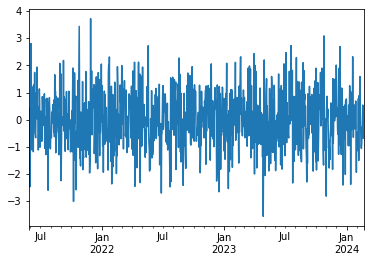

In [5]:
ts.plot()

In [6]:
ts = ts.cumsum()

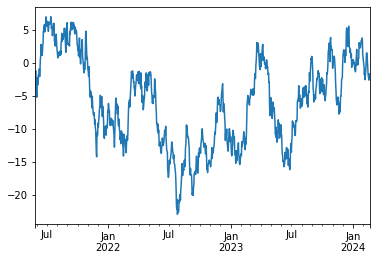

In [9]:
ts.plot()
plt.show()

In [10]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))

In [12]:
df = df.cumsum()

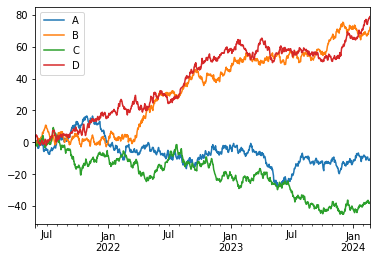

In [14]:
df.plot()
plt.show()

In [15]:
df

,A,B,C,D
2021-05-28,-0.866509,0.943997,0.637589,2.060580
2021-05-29,-0.415069,1.290614,0.897105,3.736477
2021-05-30,1.003459,0.875871,-2.028724,3.791981
2021-05-31,1.106801,0.415229,-1.480309,4.645563
2021-06-01,0.717484,-0.544749,-1.557622,3.846373
...,...,...,...,...
2024-02-17,-11.369276,69.717444,-38.340909,77.035218
2024-02-18,-11.333389,70.056118,-38.261481,77.743905
2024-02-19,-11.412282,70.227789,-38.130879,78.357691
2024-02-20,-11.172133,70.036849,-38.458513,78.070416


In [16]:
df.to_csv('foo.csv')

In [21]:
test = pd.read_csv('foo.csv')

In [22]:
test

,Unnamed: 0,A,B,C,D
0,2021-05-28,-0.866509,0.943997,0.637589,2.060580
1,2021-05-29,-0.415069,1.290614,0.897105,3.736477
2,2021-05-30,1.003459,0.875871,-2.028724,3.791981
3,2021-05-31,1.106801,0.415229,-1.480309,4.645563
4,2021-06-01,0.717484,-0.544749,-1.557622,3.846373
...,...,...,...,...,...
995,2024-02-17,-11.369276,69.717444,-38.340909,77.035218
996,2024-02-18,-11.333389,70.056118,-38.261481,77.743905
997,2024-02-19,-11.412282,70.227789,-38.130879,78.357691
998,2024-02-20,-11.172133,70.036849,-38.458513,78.070416


In [23]:
from bs4 import BeautifulSoup as bs
import requests

In [25]:
loc = '03310600'
html= requests.get('https://weather.naver.com/today/' + loc)

In [27]:
html.text

'<!doctype html>\n<html lang="ko" data-platform="pc" data-useragent="python-requests/2.23.0">\n    <head>\n        <meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width,initial-scale=1.0,user-scalable=no,maximum-scale=1">\n<meta name="format-detection" content="telephone=no">\n<meta property="og:title" content="네이버 날씨"/>\n<meta property="og:url" content="http://weather.naver.com/today/03310600"/>\n<meta property="og:image" content="https://ssl.pstatic.net/static/weather/m/og_weather.png"/>\n<meta property="og:description" content="국내외 날씨와 미세먼지에 대한 종합정보 제공"/>\n<link rel="shortcut icon" href="https://ssl.pstatic.net/static/www/nFavicon24.png" type="image/x-icon">\n<link rel="preload" href="https://ssl.pstatic.net/static/weather/font/NotoSans-Regular.woff2" as="font" type="font/woff2" crossorigin="anonymous">\n    <link rel="preload" href="https://ssl.pstatic.net/static/weather/font/NotoSans-Light.woff2" as="font" 

In [30]:
soup = bs(html.text,'html.parser')

In [33]:
data1 = soup.find('div',{'data-region-code':loc})

In [40]:
data2 = data1.find('div',{'class':'weather_area'})

In [41]:
data3 = data2.find('strong',{'class':'current'})

In [42]:
data3

<strong class="current"><span class="blind">현재 온도</span>19<span class="degree">°</span></strong>

In [43]:
data3 = data3.text

In [45]:
current_temp = data3[5:].strip()

In [46]:
current_temp

'19°'

In [47]:
if loc=="03310600":
  loc_text = "거제시의 현재 온도"
  print("{}는 {}입니다.".format(loc_text, current_temp))
else :
  print("{}는 {}입니다.".format(loc, current_temp))

거제시의 현재 온도는 19°입니다.


In [48]:
from bs4 import BeautifulSoup as bs
import requests

In [50]:
html = requests.get('https://comic.naver.com/webtoon/weekday.nhn')
soup = bs(html.text, 'html.parser')

In [51]:
data1 = soup.find('div',{'class':'col_inner'})

In [52]:
data2 = data1.find('a',{'class':'title'})

In [54]:
data3 = data1.findAll('a', {'class':'title'})

In [55]:
title_list = []
for i in data3:
  title_list.append(i.text)

In [56]:
title_list

['신의 탑',
 '참교육',
 '뷰티풀 군바리',
 '파이게임',
 '윈드브레이커',
 '소녀의 세계',
 '장씨세가 호위무사',
 '삼매경',
 '만렙돌파',
 '칼가는 소녀',
 '요리GO',
 '앵무살수',
 '황제와의 하룻밤',
 '유일무이 로맨스',
 '잔불의 기사',
 '야생천사 보호구역',
 '히어로메이커',
 '오늘의 순정망화',
 '리턴 투 플레이어',
 '수영만화일기',
 '결혼생활 그림일기',
 '평범한 8반',
 '사랑의 헌옷수거함',
 '아는 여자애',
 '순정말고 순종',
 '바로 보지 않는',
 '꿈의 기업',
 '브랜든',
 '착한건 돈이된다',
 '최후의 금빛아이',
 '기사님을 지켜줘',
 '싸이코 리벤지',
 '선배, 그 립스틱 바르지 마요',
 '왕따협상',
 '피플',
 '침범',
 '살아간다',
 '마지막 지수',
 '이중첩자',
 '뱀파이어의 꽃',
 '사막에 핀 달',
 '원하는 건 너 하나',
 '라서드',
 '중독연구소',
 '개밥 먹는 남자',
 '백호랑',
 '이탄국의 자청비',
 '인간의 온도',
 '모락모락 왕세자님',
 '드로잉 레시피',
 '그림자 신부',
 '하슬라',
 '트리거',
 '오로지 오로라',
 '헬로맨스',
 '보살님이 캐리해!']

In [58]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd

In [59]:
html = requests.get("https://www.bbq.co.kr/menu/menuList.asp")
soup = bs(html.text, 'html.parser')

In [60]:
name = soup.select('div.info > p.name')

In [62]:
name
names = []
for i in name:
  names.append(i.text)

In [63]:
price = soup.select('div.info>p.pay')
price = []
for i in price:
  prices.append(i.text)

In [66]:
header = ['메뉴', '가격']
df = pd.DataFrame([x for x in zip(name,prices)], columns=header)
print(df)

# 문자열인 가격을 숫자로 바꿔주는 작업. 평균을 구하려면 데이터타입이 INT여야한다.
df['가격'] = df['가격'].apply(lambda x: x.replace('원', ''))
df['가격'] = df['가격'].apply(lambda x: x.replace(',', ''))
df = df.astype({'가격': 'int'})
avg = df['가격'].mean()
std = df['가격'].std()

print('전체 평균가  : %d 원'%avg)
print('표준 편차   : ', std)

NameError: ignored